

# INTRODUCTION



# Household Monthly Electricity Bill

The objective of this project is to find the strongest correlations to determine what variables increase the monthly electric bill and to use these variables to predict the monthly electric bil using a regression model. After looking at the dataset I make a set of assumptions and formulate several hypotheses to be tested. 


The hypotheses I've formulate are the following to be tested:

Hypothesis 1: If the number of rooms increase the amount paid will increase

Hypothesis 2: If the number of people increase the amount paid will increase

Hypothesis 3: If the housearea increase the amount paid will increase

Hypothesis 4: If the number of rooms and number of people increase the amount paid will increase

Hypothesis 5: If the number of rooms and house area increses the amount paid will icrease


I will initially test assumptions and then retest after further evaluation. And I will proceed with attempting to improve the accuracy of the model.

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

#from sklearn.metrics import accuracy_score

%matplotlib inline


# Data Exploration

The following steps are to explore the data and to clean any problematic inputs. I impletement the following methods on the dataframs

.head() to explore the column names and to get a sense of what potential variables may be used for my independent and dependent variables

.shape to explore the number of columns and rows, this will also aid in train_test split and how to split the training and test data. 

.dtypesis implemented to determine incorrect data types that may need to be potential altered for better readability for our analysis

.info() is implmented to explore any null values. Determining this crucial to execution of our model. Any missing or null values will prevent the linear model from being read by sklearn module in Python. 

In [172]:
file_path =r'C:\Users\marvi\OneDrive\Desktop\UC Davis Python\Household energy bill data.csv'

electricBill_df = pd.read_csv(file_path, index_col=False)

electricBill_df.head()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625


In [158]:
electricBill_df.shape

(1000, 10)

In [159]:
electricBill_df.dtypes

num_rooms               int64
num_people              int64
housearea             float64
is_ac                   int64
is_tv                   int64
is_flat                 int64
ave_monthly_income    float64
num_children            int64
is_urban                int64
amount_paid           float64
dtype: object

In [160]:
electricBill_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_rooms           1000 non-null   int64  
 1   num_people          1000 non-null   int64  
 2   housearea           1000 non-null   float64
 3   is_ac               1000 non-null   int64  
 4   is_tv               1000 non-null   int64  
 5   is_flat             1000 non-null   int64  
 6   ave_monthly_income  1000 non-null   float64
 7   num_children        1000 non-null   int64  
 8   is_urban            1000 non-null   int64  
 9   amount_paid         1000 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 78.2 KB


In [161]:
electricBill_df.memory_usage

<bound method DataFrame.memory_usage of      num_rooms  num_people  housearea  is_ac  is_tv  is_flat  \
0            3           3     742.57      1      1        1   
1            1           5     952.99      0      1        0   
2            3           1     761.44      1      1        1   
3            0           5     861.32      1      1        0   
4            1           8     731.61      0      1        0   
..         ...         ...        ...    ...    ...      ...   
995          3           0     991.31      0      1        0   
996          2           5     847.97      0      1        0   
997          2           4     660.94      1      0        0   
998          1           1     814.75      0      1        1   
999          1           6     835.43      0      0        0   

     ave_monthly_income  num_children  is_urban  amount_paid  
0               9675.93             2         0   560.481447  
1              35064.79             1         1   633.283679  
2 

In [162]:
electricBill_df.describe()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.962000,4.897000,794.703420,0.376000,0.798000,0.477000,24684.986550,1.078000,0.608000,600.396359
std,1.030348,2.007591,147.771736,0.484622,0.401693,0.499721,9678.228224,0.934232,0.488441,181.406210
min,-1.000000,-1.000000,244.400000,0.000000,0.000000,0.000000,-1576.440000,0.000000,0.000000,87.851850
25%,1.000000,4.000000,691.037500,0.000000,1.000000,0.000000,18036.762500,0.000000,0.000000,475.065141
50%,2.000000,5.000000,789.970000,0.000000,1.000000,0.000000,24742.575000,1.000000,1.000000,598.331726
75%,3.000000,6.000000,892.955000,1.000000,1.000000,1.000000,31402.357500,2.000000,1.000000,729.930489
max,5.000000,11.000000,1189.120000,1.000000,1.000000,1.000000,56531.080000,4.000000,1.000000,1102.994109


In [163]:
electricBill_df.head()



,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625


In [164]:
#df = df.loc[(df != 0).any(axis=1)]

#df.loc[~(df==0).all(axis=1)]





In [165]:
electricBill_df.dropna(inplace=True)

electricBill_df.head()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625


In [166]:
plt.figure(figsize = (10,10))

electricBill_df.corr().style.background_gradient(cmap='coolwarm')

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
num_rooms,1.000000,-0.005765,-0.033561,0.018620,-0.016146,0.004133,-0.000345,-0.037474,-0.015705,-0.023933
num_people,-0.005765,1.000000,0.000072,0.033672,0.020101,0.012104,0.019152,-0.010656,-0.023863,0.053501
housearea,-0.033561,0.000072,1.000000,0.036039,0.088323,0.007986,-0.042645,0.038699,0.024902,0.096157
is_ac,0.018620,0.033672,0.036039,1.000000,-0.000247,0.002678,-0.014054,-0.027256,-0.053317,0.390003
is_tv,-0.016146,0.020101,0.088323,-0.000247,1.000000,-0.028155,0.013664,0.015353,0.034774,0.197613
is_flat,0.004133,0.012104,0.007986,0.002678,-0.028155,1.000000,-0.014879,-0.028315,-0.000066,0.147927
ave_monthly_income,-0.000345,0.019152,-0.042645,-0.014054,0.013664,-0.014879,1.000000,0.008329,-0.039424,0.025889
num_children,-0.037474,-0.010656,0.038699,-0.027256,0.015353,-0.028315,0.008329,1.000000,-0.007511,0.447512
is_urban,-0.015705,-0.023863,0.024902,-0.053317,0.034774,-0.000066,-0.039424,-0.007511,1.000000,0.649568
amount_paid,-0.023933,0.053501,0.096157,0.390003,0.197613,0.147927,0.025889,0.447512,0.649568,1.000000


<Figure size 720x720 with 0 Axes>


# Defining Variables 

# Define X and y

In above I rerun the cell with the .head() method to identify the variables I'm targeting for the next step in the model creation. 

The hypotheses I've formulate are the following to be tested. 

Hypothesis 1:  If the number of rooms increase the amount paid will increase






In [167]:
#Define X variable

electricBill_df.drop(electricBill_df.iloc[:, 1:10], axis=1, inplace=True)

electricBill_df.values

X=electricBill_df.values

X

array([[ 3],
       [ 1],
       [ 3],
       [ 0],
       [ 1],
       [ 0],
       [ 4],
       [ 3],
       [ 2],
       [ 1],
       [ 2],
       [ 1],
       [ 0],
       [ 2],
       [ 2],
       [ 1],
       [ 3],
       [ 2],
       [ 4],
       [ 3],
       [ 1],
       [ 3],
       [ 1],
       [ 1],
       [ 2],
       [ 2],
       [ 3],
       [ 1],
       [ 1],
       [ 2],
       [ 3],
       [ 1],
       [ 3],
       [ 0],
       [ 2],
       [ 2],
       [ 2],
       [ 3],
       [ 1],
       [ 4],
       [ 2],
       [ 1],
       [ 3],
       [ 2],
       [ 2],
       [ 3],
       [ 1],
       [ 1],
       [ 2],
       [ 1],
       [ 2],
       [ 1],
       [ 1],
       [ 5],
       [ 3],
       [ 3],
       [ 2],
       [ 2],
       [ 3],
       [ 1],
       [ 1],
       [ 3],
       [ 3],
       [ 3],
       [ 1],
       [ 3],
       [ 2],
       [ 2],
       [ 4],
       [ 1],
       [ 1],
       [ 2],
       [ 1],
       [ 2],
       [ 1],
       [ 4],
       [ 2],

In [168]:
X.shape



(1000, 1)

In [177]:
#Define y variable
electricBill_df['amount_paid']

electricBill_df['amount_paid'].values

y = electricBill_df['amount_paid']

y

0      560.481447
1      633.283679
2      511.879157
3      332.992035
4      658.285625
          ...    
995    655.870111
996    354.472693
997    568.660550
998    653.423314
999    537.801005
Name: amount_paid, Length: 1000, dtype: float64

In [178]:
y.shape



(1000,)


# Split the dataset into Training and Test Set for Hypothesis 1


skelearn.model_selection.train_test_split

In [179]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)



# Train the model on the Training Set for Hypothesis 1

In [180]:
from sklearn.linear_model import LinearRegression

ml = LinearRegression()
ml.fit(X_train, y_train)

LinearRegression()

In [209]:
 r_sq = ml.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: -0.022319035956823052



# Predict Test Results for Hypothesis 1

In [181]:
y_pred = ml.predict(X_test)

print(y_pred)

#y_pred

[599.23605027 599.23605027 605.57208313 605.57208313 605.57208313
 599.23605027 605.57208313 611.90811599 605.57208313 605.57208313
 599.23605027 599.23605027 599.23605027 599.23605027 611.90811599
 599.23605027 592.90001742 605.57208313 611.90811599 592.90001742
 599.23605027 605.57208313 599.23605027 599.23605027 599.23605027
 599.23605027 592.90001742 592.90001742 611.90811599 592.90001742
 586.56398456 599.23605027 599.23605027 611.90811599 586.56398456
 611.90811599 599.23605027 599.23605027 592.90001742 605.57208313
 592.90001742 605.57208313 592.90001742 592.90001742 611.90811599
 611.90811599 592.90001742 592.90001742 599.23605027 592.90001742
 605.57208313 599.23605027 599.23605027 605.57208313 605.57208313
 592.90001742 592.90001742 599.23605027 592.90001742 592.90001742
 592.90001742 592.90001742 599.23605027 611.90811599 592.90001742
 605.57208313 599.23605027 592.90001742 605.57208313 592.90001742
 599.23605027 599.23605027 605.57208313 592.90001742 599.23605027
 605.57208

In [212]:
ml.predict([[0]])

array([611.90811599])

In [210]:
electricBill_df.head()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625



# Evaluate The Model for Hypothesis 1


In [206]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)



-0.007894164007251181



# Plot Results

# Data Visualization

Text(0.5, 1.0, 'Actual VS Predicted')

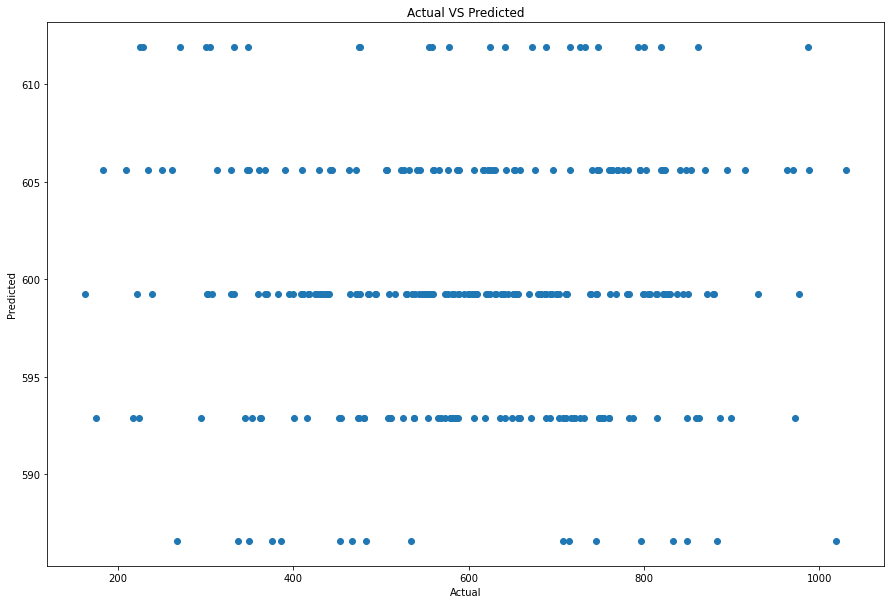

In [185]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')



# Additioinal Insights

After taking a look at the scatterplot the visualization supports no correlation between the two variables. 


# Revaluating Hypotheses 

After looking at the low correlation between the 2 variables. I reevaluated the my initial assumptions and used a heatmap to find stronger correlations


# Find Correlated Values Via Heatmap

In [213]:
plt.figure(figsize = (10,10))

electricBill_df.corr().style.background_gradient(cmap='coolwarm')

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
num_rooms,1.000000,-0.005765,-0.033561,0.018620,-0.016146,0.004133,-0.000345,-0.037474,-0.015705,-0.023933
num_people,-0.005765,1.000000,0.000072,0.033672,0.020101,0.012104,0.019152,-0.010656,-0.023863,0.053501
housearea,-0.033561,0.000072,1.000000,0.036039,0.088323,0.007986,-0.042645,0.038699,0.024902,0.096157
is_ac,0.018620,0.033672,0.036039,1.000000,-0.000247,0.002678,-0.014054,-0.027256,-0.053317,0.390003
is_tv,-0.016146,0.020101,0.088323,-0.000247,1.000000,-0.028155,0.013664,0.015353,0.034774,0.197613
is_flat,0.004133,0.012104,0.007986,0.002678,-0.028155,1.000000,-0.014879,-0.028315,-0.000066,0.147927
ave_monthly_income,-0.000345,0.019152,-0.042645,-0.014054,0.013664,-0.014879,1.000000,0.008329,-0.039424,0.025889
num_children,-0.037474,-0.010656,0.038699,-0.027256,0.015353,-0.028315,0.008329,1.000000,-0.007511,0.447512
is_urban,-0.015705,-0.023863,0.024902,-0.053317,0.034774,-0.000066,-0.039424,-0.007511,1.000000,0.649568
amount_paid,-0.023933,0.053501,0.096157,0.390003,0.197613,0.147927,0.025889,0.447512,0.649568,1.000000


<Figure size 720x720 with 0 Axes>


# Defining Variables 1.1

# Define X and y

After evaulating the variables I formulate a new hypothesis. Per our heatmap amount_paid has a stronger correlation with 
the variable is_urban, and the variable num_children. 

Hypothesis 1.1: If the residence is urban the amount paid will increase.

Hypothesis 2.1: As the number of childeren increase the amount paid will increase.

Hypothesis 3.1: If the source of is the air condtioner the amount paid will increase.

Hypothesis 4.1: Evaluating the variables is_urban and num_children will have a stronger positive correlation on the variable amount_paid.

I will review the hypothesis 1.1 with different training test splits to evaluate if the model accuracy can be improved.


In [187]:
electricBill_df.head()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625


In [188]:
electricBill_df.shape

(1000, 10)

# Hypothesis 1.1: If the residence is urban the amount paid will increase.

In [201]:
#Define X variable. X variable should be 2 diminensional. 


electricBill_df.loc[:,['is_urban']]

electricBill_df.loc[:,['is_urban']].values

X=electricBill_df.loc[:,['is_urban']].values

X


array([[0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
    

In [195]:
#Define y variable. y variable should be 1 diminensional. 

#electricBill_df.drop(electricBill_df.iloc[:, 0:9], axis=1

electricBill_df.loc[:,['amount_paid']].values

y = electricBill_df.loc[:,['amount_paid']].values

y.shape

(1000, 1)

# Split the dataset into Training and Test Set for Hypothesis 1.1


skelearn.model_selection.train_test_split

In [214]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)

# Train the model on the Training Set for Hypothesis 1.1

In [215]:
from sklearn.linear_model import LinearRegression

ml = LinearRegression()
ml.fit(X_train, y_train)

LinearRegression()

# Predict Test Results for Hypothesis 1.1 (70/30 Split)

In [217]:
y_pred = ml.predict(X_test)

print(y_pred)

[[699.41262831]
 [699.41262831]
 [699.41262831]
 [699.41262831]
 [459.04654993]
 [699.41262831]
 [699.41262831]
 [699.41262831]
 [699.41262831]
 [459.04654993]
 [699.41262831]
 [699.41262831]
 [459.04654993]
 [699.41262831]
 [699.41262831]
 [459.04654993]
 [699.41262831]
 [699.41262831]
 [699.41262831]
 [699.41262831]
 [699.41262831]
 [459.04654993]
 [699.41262831]
 [699.41262831]
 [699.41262831]
 [699.41262831]
 [699.41262831]
 [459.04654993]
 [699.41262831]
 [699.41262831]
 [699.41262831]
 [699.41262831]
 [699.41262831]
 [459.04654993]
 [699.41262831]
 [459.04654993]
 [699.41262831]
 [459.04654993]
 [459.04654993]
 [699.41262831]
 [699.41262831]
 [459.04654993]
 [459.04654993]
 [699.41262831]
 [459.04654993]
 [699.41262831]
 [699.41262831]
 [459.04654993]
 [699.41262831]
 [699.41262831]
 [699.41262831]
 [459.04654993]
 [699.41262831]
 [459.04654993]
 [459.04654993]
 [459.04654993]
 [699.41262831]
 [699.41262831]
 [699.41262831]
 [699.41262831]
 [699.41262831]
 [699.41262831]
 [459.04

In [219]:
ml.predict([[0]])

array([[459.04654993]])

In [229]:
#Dataframe head is printed to compare results of prediction vs actual

electricBill_df.head()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625


# Evaluate The Model for Hypothesis 1.1

In [220]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.4397699647293939

# Plot Results Hypothesis 1.1

Text(0.5, 1.0, 'Actual VS Predicted')

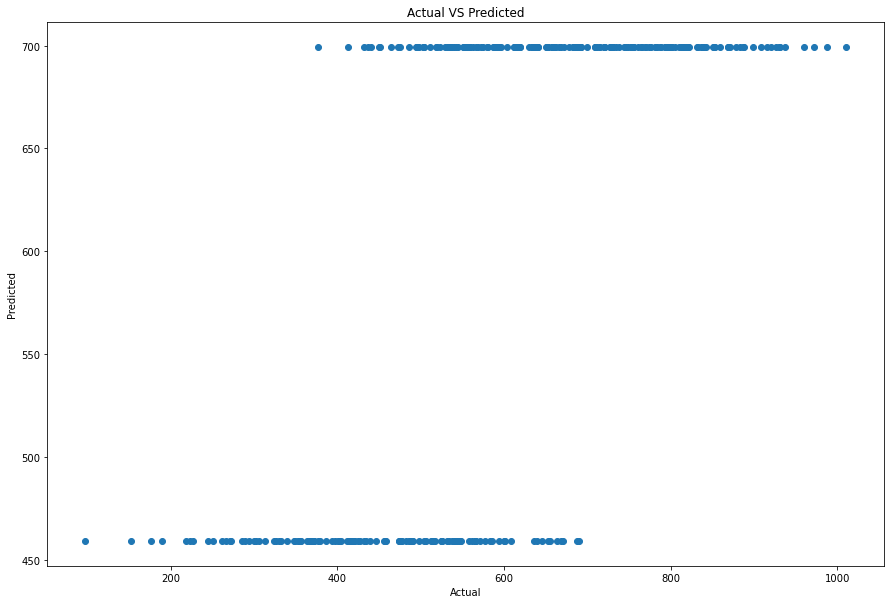

In [222]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')


# Hypothesis 1.1: Retraining with New Test_Train_Split (80/20)

In [224]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

# Train the model on the Training Set for Hypothesis 1.1 (80/20)

In [225]:
from sklearn.linear_model import LinearRegression

ml = LinearRegression()
ml.fit(X_train, y_train)

LinearRegression()

# Predict Test Results for Hypothesis 1.1 (80/20)

In [226]:
y_pred = ml.predict(X_test)

print(y_pred)

[[696.64133204]
 [696.64133204]
 [696.64133204]
 [696.64133204]
 [457.06066402]
 [696.64133204]
 [696.64133204]
 [696.64133204]
 [696.64133204]
 [457.06066402]
 [696.64133204]
 [696.64133204]
 [457.06066402]
 [696.64133204]
 [696.64133204]
 [457.06066402]
 [696.64133204]
 [696.64133204]
 [696.64133204]
 [696.64133204]
 [696.64133204]
 [457.06066402]
 [696.64133204]
 [696.64133204]
 [696.64133204]
 [696.64133204]
 [696.64133204]
 [457.06066402]
 [696.64133204]
 [696.64133204]
 [696.64133204]
 [696.64133204]
 [696.64133204]
 [457.06066402]
 [696.64133204]
 [457.06066402]
 [696.64133204]
 [457.06066402]
 [457.06066402]
 [696.64133204]
 [696.64133204]
 [457.06066402]
 [457.06066402]
 [696.64133204]
 [457.06066402]
 [696.64133204]
 [696.64133204]
 [457.06066402]
 [696.64133204]
 [696.64133204]
 [696.64133204]
 [457.06066402]
 [696.64133204]
 [457.06066402]
 [457.06066402]
 [457.06066402]
 [696.64133204]
 [696.64133204]
 [696.64133204]
 [696.64133204]
 [696.64133204]
 [696.64133204]
 [457.06

In [227]:
ml.predict([[0]])

array([[457.06066402]])

In [228]:
ml.predict([[1]])

array([[696.64133204]])

In [230]:
electricBill_df.head()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625


# Evaluate The Model for Hypothesis 1.1 (80/20 Split)

In [232]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

#The results show only a modest improvement

0.45323374718431153

# Hypothesis 1.1: Retraining with New Test_Train_Split (90/10)

In [233]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 0)

# Train the model on the Training Set for Hypothesis 1.1 (90/10)

In [234]:
from sklearn.linear_model import LinearRegression

ml = LinearRegression()
ml.fit(X_train, y_train)

LinearRegression()

# Predict Test Results for Hypothesis 1.1 (90/10)

In [235]:
y_pred = ml.predict(X_test)

print(y_pred)

[[695.85302953]
 [695.85302953]
 [695.85302953]
 [695.85302953]
 [456.60183855]
 [695.85302953]
 [695.85302953]
 [695.85302953]
 [695.85302953]
 [456.60183855]
 [695.85302953]
 [695.85302953]
 [456.60183855]
 [695.85302953]
 [695.85302953]
 [456.60183855]
 [695.85302953]
 [695.85302953]
 [695.85302953]
 [695.85302953]
 [695.85302953]
 [456.60183855]
 [695.85302953]
 [695.85302953]
 [695.85302953]
 [695.85302953]
 [695.85302953]
 [456.60183855]
 [695.85302953]
 [695.85302953]
 [695.85302953]
 [695.85302953]
 [695.85302953]
 [456.60183855]
 [695.85302953]
 [456.60183855]
 [695.85302953]
 [456.60183855]
 [456.60183855]
 [695.85302953]
 [695.85302953]
 [456.60183855]
 [456.60183855]
 [695.85302953]
 [456.60183855]
 [695.85302953]
 [695.85302953]
 [456.60183855]
 [695.85302953]
 [695.85302953]
 [695.85302953]
 [456.60183855]
 [695.85302953]
 [456.60183855]
 [456.60183855]
 [456.60183855]
 [695.85302953]
 [695.85302953]
 [695.85302953]
 [695.85302953]
 [695.85302953]
 [695.85302953]
 [456.60

In [236]:
ml.predict([[0]])

array([[456.60183855]])

In [237]:
ml.predict([[1]])

array([[695.85302953]])

# Evaluate The Model for Hypothesis 1.1 (90/10 Split)

In [241]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)


0.46618749787471014

"""Again the results are improved however only very slightly. Please note, additional visualizations were not provided due to 
the only modest variations in result performance from the previous iterations.""

# Recommendation

The first attempt at building a model to forecast what influenced the price of the household electric bills did not produce very high accuracy. Upon looking at the results further investigation is required. However, based on the output the predicted values do align with  the values in the dataset. The following actions should occur:

1. Continue testing the other hypothesis for further investingation

2. Look at standard mean error between actual and predicted values

3. Create several multivariate models with no more than two variables. 

4. Place the amount_predicted values in bins and create a logistic regression model to test if the amout paid will determine if the area is an urban or non-urban area. 


Our first attempt seems to indicate that urban areas are paying a higher amount than non-urban areas. Once the previous reccommeded actions occur, additional reasearch should be conducted to determine the reason for this outcome. Are the causes technological, geographical, or social?